# Projeto 1 - Acertar o tipo de flor da espécie Iris

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img1.png?raw=true" width="500" height="100"/>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from plotnine import *
import pickle
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/fgiordanelli/Projeto1/main/Datasets/dataset1.csv")

In [42]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


## Ver o balanceamento da base de dados
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true" width="500" height="100"/>

In [43]:
total = df.groupby('species').agg(n = ('species','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [44]:
total

,species,n,perc
0,setosa,50,50.0
1,versicolor,50,50.0


## Ver se tem valores fora do padrão
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img3.png?raw=true" width="300" height="100"/>

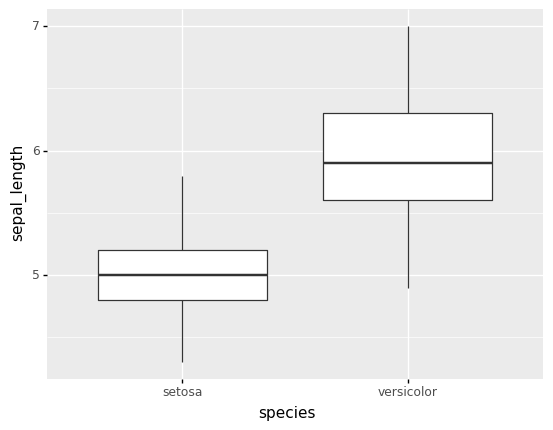

<ggplot: (97704429364)>

In [45]:
(
    ggplot(df)
    + geom_boxplot(aes(x='species', y='sepal_length'))
)

##  Separar em Treino e Teste

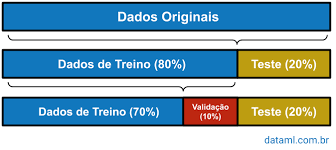

In [46]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

## Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img5.png?raw=true" width="350" height="100"/>

## Tratar Valor Vazio

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img6.png?raw=true" width="400" height="150"/>

In [47]:
pd.isna(df).sum().to_frame('Valor Vazio')

,Valor Vazio
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# Tratar variáveis categóricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img7.png?raw=true" width="600" height="100"/>

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [48]:
train_x = train.drop('species',axis=1)
train_y = train['species']

In [49]:
test_x = test.drop('species',axis=1)
test_y = test['species']

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img8.png?raw=true" width="250" height="80"/>

In [50]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier(min_samples_leaf=10).fit(train_x, train_y)
KNN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC(probability=True).fit(train_x,train_y) 
RF = RandomForestClassifier().fit(train_x,train_y)

# Como funciona?

In [51]:
train['probabilidade LR'] = LR.predict_proba(train_x)[:,1]
train['probabilidade DT'] = DT.predict_proba(train_x)[:,1]
train['probabilidade SVM'] = SVM.predict_proba(train_x)[:,1]
train['cutoff / threshold'] = 0.5
train['predito LR'] = LR.predict(train_x)
train['predito DT'] = DT.predict(train_x)
train['predito SVM'] = SVM.predict(train_x)
train

,sepal_length,sepal_width,petal_length,petal_width,species,probabilidade LR,probabilidade DT,probabilidade SVM,cutoff / threshold,predito LR,predito DT,predito SVM
43,5.0,3.5,1.6,0.6,setosa,0.039962,0.0,0.036186,0.5,setosa,setosa,setosa
62,6.0,2.2,4.0,1.0,versicolor,0.982288,1.0,0.983598,0.5,versicolor,versicolor,versicolor
3,4.6,3.1,1.5,0.2,setosa,0.026618,0.0,0.025060,0.5,setosa,setosa,setosa
71,6.1,2.8,4.0,1.3,versicolor,0.978740,1.0,0.980444,0.5,versicolor,versicolor,versicolor
45,4.8,3.0,1.4,0.3,setosa,0.027613,0.0,0.025281,0.5,setosa,setosa,setosa
...,...,...,...,...,...,...,...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,versicolor,0.982417,1.0,0.983841,0.5,versicolor,versicolor,versicolor
67,5.8,2.7,4.1,1.0,versicolor,0.976655,1.0,0.980987,0.5,versicolor,versicolor,versicolor
64,5.6,2.9,3.6,1.3,versicolor,0.934157,1.0,0.960489,0.5,versicolor,versicolor,versicolor
47,4.6,3.2,1.4,0.2,setosa,0.019745,0.0,0.019059,0.5,setosa,setosa,setosa


## Escolher a métrica

In [1]:
print("Acurácia treino LR:", LR.score(train_x, train_y), "\n")
print("Acurácia treino LDA:", LDA.score(train_x, train_y), "\n")
print("Acurácia treino DT:", DT.score(train_x, train_y), "\n")
print("Acurácia treino KNN:", KNN.score(train_x, train_y), "\n")
print("Acurácia treino SVM:", SVM.score(train_x, train_y), "\n")
print("Acurácia treino RF:", SVM.score(train_x, train_y), "\n")

NameError: name 'LR' is not defined

## Encapsular o modelo e Salvar

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img9.png?raw=true" width="200" height="80"/>

In [53]:
pickle.dump(LR, open('Modelo_Iris.sav', 'wb'))

## Abrir modelo salvo

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img10.png?raw=true" width="300" height="100"/>


In [54]:
loaded_model = pickle.load(open('Modelo_Iris.sav', 'rb'))

## Testar agora pro teste. Ver se houve overfitting

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img11.png?raw=true" width="150" height="80"/>

In [55]:
print("Acurácia teste LR:", loaded_model.score(test_x, test_y), "\n")

Acurácia teste LR: 1.0 



In [56]:
sepal_length = input()
sepal_width = input()
petal_length = input()
petal_width = input()

0
1
0
5


In [57]:
prediction = loaded_model.predict(np.array([[sepal_length, sepal_width, petal_length, petal_width]]))
print(f"Prediction: {prediction}")

Prediction: ['setosa']
